# Exploring New York State's Outdoor Recreation and Conservation Assets: A GIS Analysis
  

In [1]:
#import libraries
import geopandas as gpd

# Types of geospatial file format 
- shapefile : IS THE MOST COMMON FILE TYPE THAT ONE CAN COUNTER WORKING GEOSPATIAL ANALYSIS AND TO LOAD IT WE USE gpd.read_file() function
- GeoJSON
- KML
- GPKG 

In [2]:
# Read in the data
full_data = gpd.read_file("DEC_lands")
full_data.head()

,OBJECTID,CATEGORY,UNIT,FACILITY,CLASS,UMP,DESCRIPTIO,REGION,COUNTY,URL,SOURCE,UPDATE_,OFFICE,ACRES,LANDS_UID,GREENCERT,SHAPE_AREA,SHAPE_LEN,geometry
0,1,FOR PRES DET PAR,CFP,HANCOCK FP DETACHED PARCEL,WILD FOREST,NaN,DELAWARE COUNTY DETACHED PARCEL,4,DELAWARE,http://www.dec.ny.gov/,DELAWARE RPP,5/12,STAMFORD,738.620192,103,N,2.990365e+06,7927.662385,"POLYGON ((486093.245 4635308.586, 486787.235 4..."
1,2,FOR PRES DET PAR,CFP,HANCOCK FP DETACHED PARCEL,WILD FOREST,NaN,DELAWARE COUNTY DETACHED PARCEL,4,DELAWARE,http://www.dec.ny.gov/,DELAWARE RPP,5/12,STAMFORD,282.553140,1218,N,1.143940e+06,4776.375600,"POLYGON ((491931.514 4637416.256, 491305.424 4..."
2,3,FOR PRES DET PAR,CFP,HANCOCK FP DETACHED PARCEL,WILD FOREST,NaN,DELAWARE COUNTY DETACHED PARCEL,4,DELAWARE,http://www.dec.ny.gov/,DELAWARE RPP,5/12,STAMFORD,234.291262,1780,N,9.485476e+05,5783.070364,"POLYGON ((486000.287 4635834.453, 485007.550 4..."
3,4,FOR PRES DET PAR,CFP,GREENE COUNTY FP DETACHED PARCEL,WILD FOREST,NaN,NaN,4,GREENE,http://www.dec.ny.gov/,GREENE RPP,5/12,STAMFORD,450.106464,2060,N,1.822293e+06,7021.644833,"POLYGON ((541716.775 4675243.268, 541217.579 4..."
4,6,FOREST PRESERVE,AFP,SARANAC LAKES WILD FOREST,WILD FOREST,SARANAC LAKES,NaN,5,ESSEX,http://www.dec.ny.gov/lands/22593.html,"DECRP, ESSEX RPP",12/96,RAY BROOK,69.702387,1517,N,2.821959e+05,2663.909932,"POLYGON ((583896.043 4909643.187, 583891.200 4..."


In [3]:
full_data.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2983 entries, 0 to 2982
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    2983 non-null   int64   
 1   CATEGORY    2983 non-null   object  
 2   UNIT        2473 non-null   object  
 3   FACILITY    2976 non-null   object  
 4   CLASS       1219 non-null   object  
 5   UMP         2347 non-null   object  
 6   DESCRIPTIO  480 non-null    object  
 7   REGION      2983 non-null   int64   
 8   COUNTY      2983 non-null   object  
 9   URL         2983 non-null   object  
 10  SOURCE      2983 non-null   object  
 11  UPDATE_     2949 non-null   object  
 12  OFFICE      2811 non-null   object  
 13  ACRES       2983 non-null   float64 
 14  LANDS_UID   2983 non-null   int64   
 15  GREENCERT   2982 non-null   object  
 16  SHAPE_AREA  2983 non-null   float64 
 17  SHAPE_LEN   2983 non-null   float64 
 18  geometry    2983 non-null   geometry
dty

In [4]:
full_data.columns

Index(['OBJECTID', 'CATEGORY', 'UNIT', 'FACILITY', 'CLASS', 'UMP',
       'DESCRIPTIO', 'REGION', 'COUNTY', 'URL', 'SOURCE', 'UPDATE_', 'OFFICE',
       'ACRES', 'LANDS_UID', 'GREENCERT', 'SHAPE_AREA', 'SHAPE_LEN',
       'geometry'],
      dtype='object')

In [5]:
full_data.describe()

,OBJECTID,REGION,ACRES,LANDS_UID,SHAPE_AREA,SHAPE_LEN
count,2983.000000,2983.000000,2983.000000,2983.000000,2.983000e+03,2983.000000
mean,1802.352330,5.143815,1339.732709,2089.354006,5.424019e+06,9081.648057
std,1577.280669,1.928753,9057.752502,1378.927232,3.667106e+07,23334.595215
min,1.000000,1.000000,0.002199,0.000000,8.901263e+00,11.165475
25%,815.500000,4.000000,3.940500,955.500000,1.595344e+04,681.702216
50%,1586.000000,5.000000,53.151273,1890.000000,2.151873e+05,2547.098389
75%,2388.000000,6.000000,524.856806,2827.500000,2.124926e+06,9067.118587
max,9957.000000,9.000000,274863.012528,4742.000000,1.112806e+09,419521.821277


In [6]:
# Check dataframe- GeoDataFrame object has all of the capabilities of a (Pandas) DataFrame.
type (full_data)

geopandas.geodataframe.GeoDataFrame

In [7]:
#value_counts() method to see a list of different land types, along with how many times they appear in the dataset
full_data.value_counts()

OBJECTID  CATEGORY         UNIT  FACILITY                     CLASS          UMP            DESCRIPTIO                         REGION  COUNTY      URL                                                        SOURCE    UPDATE_  OFFICE       ACRES       LANDS_UID  GREENCERT  SHAPE_AREA    SHAPE_LEN     geometry                                         
99        FOREST PRESERVE  AFP   SECOND POND BOAT LAUNCH      INTENSIVE USE  SARANAC LAKES  AKA STATE BRIDGE BOAT LAUNCH SITE  5       FRANKLIN    https://www.dec.ny.gov/outdoor/32524.html                  DECLANDF  6/13     RAY BROOK    9.108131    2554       N          3.687502e+04  838.237745    POLYGON ((564964.425 4904198.889, 565000.301 4...    1
2266      FOREST PRESERVE  AFP   ROGERS ROCK CAMPGROUND       INTENSIVE USE  LAKE GEORGE    JUNIPER ISLAND                     5       WARREN      http://www.dec.ny.gov/outdoor/24493.html                   DECRP     6/08     WARRENSBURG  0.205868    1328       N          8.334751e+02  129.57633

In [8]:
# Subset of data- select only the columns that we need
data = full_data.loc[:, ["CLASS", "COUNTY", "geometry"]].copy()

# Types of Land in Dataset

In [9]:
data.CLASS.value_counts()

CLASS
WILD FOREST                   965
INTENSIVE USE                 108
PRIMITIVE                      60
WILDERNESS                     52
ADMINISTRATIVE                 17
UNCLASSIFIED                    7
HISTORIC                        5
PRIMITIVE BICYCLE CORRIDOR      4
CANOE AREA                      1
Name: count, dtype: int64

# To select subset of data we can use these functions: 
- loc 
- iloc
- isin

In [58]:
#select lands that falls under the "WILD FOREST" OR "WILDERNESS" category
wild_land = data.loc[data.CLASS.isin(['WILD FOREST','WILDERNESS'])].copy()
wild_land.head()

,CLASS,COUNTY,geometry
0,WILD FOREST,DELAWARE,"POLYGON ((486093.245 4635308.586, 486787.235 4..."
1,WILD FOREST,DELAWARE,"POLYGON ((491931.514 4637416.256, 491305.424 4..."
2,WILD FOREST,DELAWARE,"POLYGON ((486000.287 4635834.453, 485007.550 4..."
3,WILD FOREST,GREENE,"POLYGON ((541716.775 4675243.268, 541217.579 4..."
4,WILD FOREST,ESSEX,"POLYGON ((583896.043 4909643.187, 583891.200 4..."


# Visualize using Map
- Every GeoDataFrame contains a special "geometry" column. It contains all of the geometric objects that are displayed when we call the plot() method.

<Axes: >

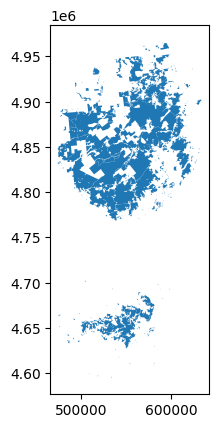

In [11]:
wild_land.plot()

In [12]:
# view the first five entries in the "geometry" column
wild_land.geometry.head()

0    POLYGON ((486093.245 4635308.586, 486787.235 4...
1    POLYGON ((491931.514 4637416.256, 491305.424 4...
2    POLYGON ((486000.287 4635834.453, 485007.550 4...
3    POLYGON ((541716.775 4675243.268, 541217.579 4...
4    POLYGON ((583896.043 4909643.187, 583891.200 4...
Name: geometry, dtype: geometry

# Geometry Column
- The "geometry" column in our dataset contains 2983 different Polygon objects, each corresponding to a different shape in the plot above.
- create three more GeoDataFrames, containing campsite locations (Point), foot trails (LineString), and county boundaries (Polygon).

In [13]:
# campsites in New York state (Point)
POI_data= gpd.read_file("Decptsofinterest")
campsites = POI_data.loc[POI_data.ASSET =='PRIMITIVE CAMPSITE'].copy()


In [14]:
POI_data.columns

Index(['OBJECTID', 'UNIT', 'FACILITY', 'NAME', 'ASSET', 'DESCRIP', 'REGION',
       'OFFICE', 'UPDATED', 'ASSET_UID', 'ACCESSIBLE', 'geometry'],
      dtype='object')

In [15]:
POI_data.info

<bound method DataFrame.info of       OBJECTID            UNIT                         FACILITY  \
0        91706             CFP             DELAWARE WILD FOREST   
1       108646     SCHUYLER 02          SUGAR HILL STATE FOREST   
2        19933             AFP   MOOSE RIVER PLAINS WILD FOREST   
3         3945     ALLEGANY 12         LOST NATION STATE FOREST   
4         1037  CATTARAUGUS 08           ROCK CITY STATE FOREST   
...        ...             ...                              ...   
4312      6662             AFP        SARANAC LAKES WILD FOREST   
4313      1497             AFP          BLACK RIVER WILD FOREST   
4314     39711             AFP        SARANAC LAKES WILD FOREST   
4315      6412             AFP           DEBAR MTN. WILD FOREST   
4316     19898             AFP  MOOSE RIVER PLAINS CAMPING AREA   

                                    NAME                ASSET DESCRIP  REGION  \
0                 ADA PRIMITIVE CAMPSITE   PRIMITIVE CAMPSITE     NaN       4   
1

In [16]:
# Foot trails in New York state (LineString)
roads_trails = gpd.read_file("DEC_roadstrails")
trails = roads_trails.loc[roads_trails.ASSET == 'FOOT TRAIL'].copy()

In [17]:
# County boundaries in New York state (Polygon)
counties = gpd.read_file("NY_county_boundaries")

# Analyzing Foot Trails
- Create map from four different GeoDataframes 
- The plot() method takes as (optional) input several parameters that can be used to customize the appearance
- Most importantly, setting a value for ax ensures that all of the information is plotted on the same map.

<Axes: >

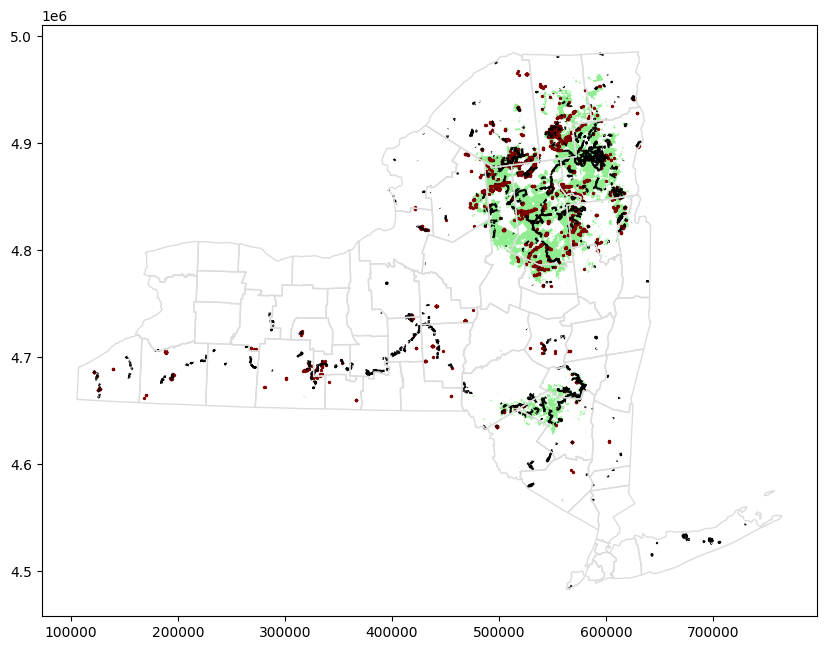

In [18]:
# Define a base map with county boundaries 
ax = counties.plot (figsize=(10,10), color='none', edgecolor='gainsboro', zorder=3)
# Add wild lands, campsites and foot trails to the base map
wild_land.plot(color = 'lightgreen', ax=ax)
campsites.plot(color='maroon', markersize=2, ax=ax)
trails.plot(color='black', markersize=1, ax=ax)

# Proximity of primitive campsites to wilderness areas
Calculates the minimum distance between each wilderness area and the nearest primitive campsite, adding a new column with this information to the wilderness areas' GeoDataFrame.

In [19]:
from shapely.ops import nearest_points

# Calculate the proximity of campsites to wilderness areas
wild_land["nearest_campsite_distance"] = wild_land.apply(
    lambda row: campsites.geometry.distance(row.geometry).min(), axis=1
)

# Print the first few rows of wilderness areas with campsite proximity
print(wild_land[["CLASS", "COUNTY", "nearest_campsite_distance"]].head())


         CLASS    COUNTY  nearest_campsite_distance
0  WILD FOREST  DELAWARE                9784.958191
1  WILD FOREST  DELAWARE                5879.576702
2  WILD FOREST  DELAWARE               10448.302797
3  WILD FOREST    GREENE               14183.826345
4  WILD FOREST     ESSEX                3245.472039


In [41]:
print(len(trails))
print(len(campsites))


2242
1843


In [42]:
# Check if geometries in 'trails' GeoDataFrame are valid
print(trails['geometry'].is_valid.all())


True


# Buffer Analysis 
Buffer analysis helps you identify areas around primitive campsites that may require specific regulations or restrictions. For this example, let's create a buffer zone around each campsite.
- This code below demonstrates buffer analysis by creating buffer zones of a specified distance (in this case, 500 meters) around primitive campsites. These buffer zones can be used to define areas where additional regulations or conservation efforts may apply.


C:\Users\Arslaan Khalid\AppData\Local\Temp\ipykernel_14120\2290857220.py:21: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


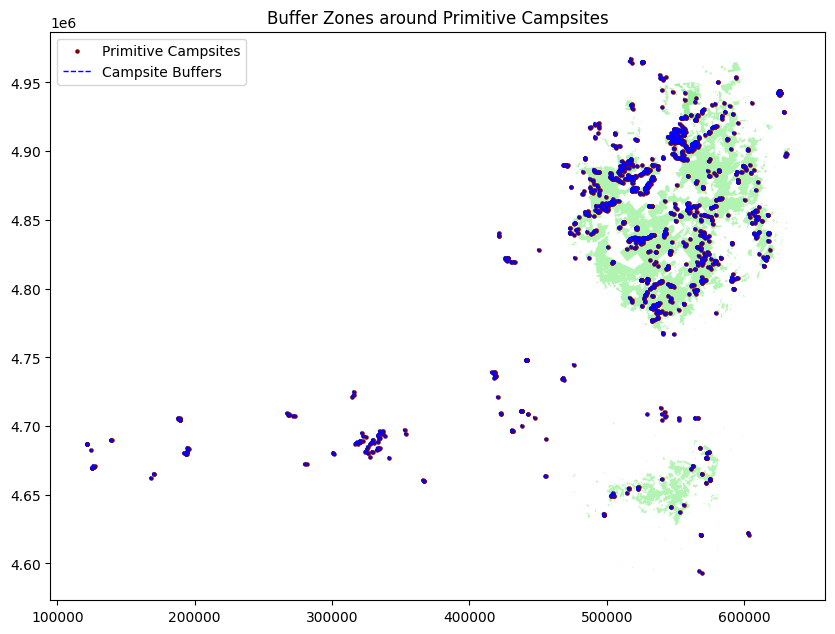

In [59]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the campsite and wilderness area datasets (
POI_data= gpd.read_file("Decptsofinterest")
campsites = POI_data.loc[POI_data.ASSET =='PRIMITIVE CAMPSITE'].copy()
wild_land = data.loc[data.CLASS.isin(['WILD FOREST','WILDERNESS'])].copy()

# Define the buffer distance in meters
buffer_distance = 800  # Adjust as needed

# Create buffers around the campsites
campsite_buffers = campsites.copy()
campsite_buffers['geometry'] = campsites.buffer(buffer_distance)

# Visualize the buffer zones
fig, ax = plt.subplots(figsize=(10, 10))
wild_land.plot(ax=ax, color='lightgreen', alpha=0.7, label='Wilderness Areas')
campsites.plot(ax=ax, color='maroon', markersize=5, label='Primitive Campsites')
campsite_buffers.boundary.plot(ax=ax, color='blue', linewidth=1, linestyle='--', label='Campsite Buffers')
plt.legend()
plt.title("Buffer Zones around Primitive Campsites")
plt.show()
